# Sample 15arc-sec GEBCO_2023.nc on OM5 grid

## Apply edits to the topography.

## REGION= [[-60,-30,-300,-220,],]

In [1]:
# Notebook editor: Brandon.Reichl

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [-60,-30,-300,-220]
Region_Name = '04: Southern Ocean 1'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


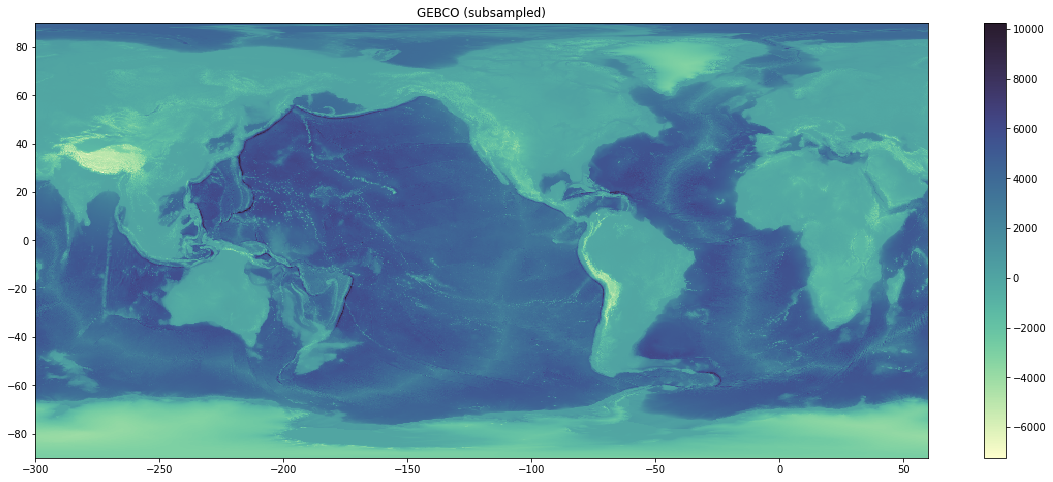

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

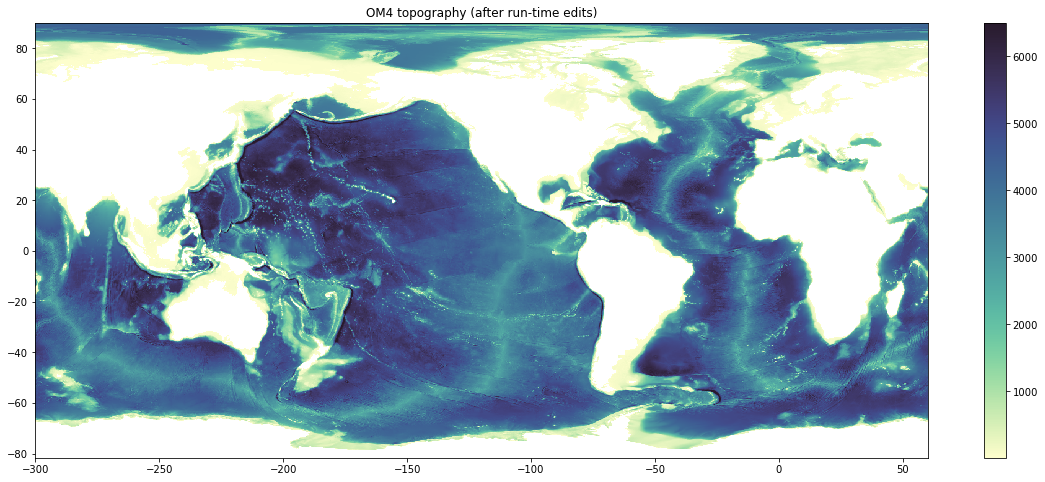

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


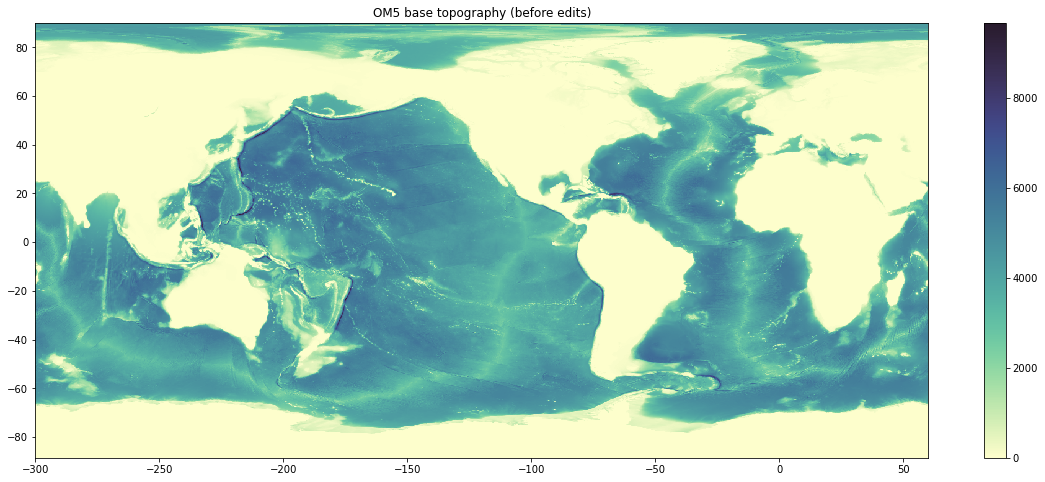

In [6]:
OM5 = OM5_data('/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_hgrid.nc',
               '/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_topog_merged.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

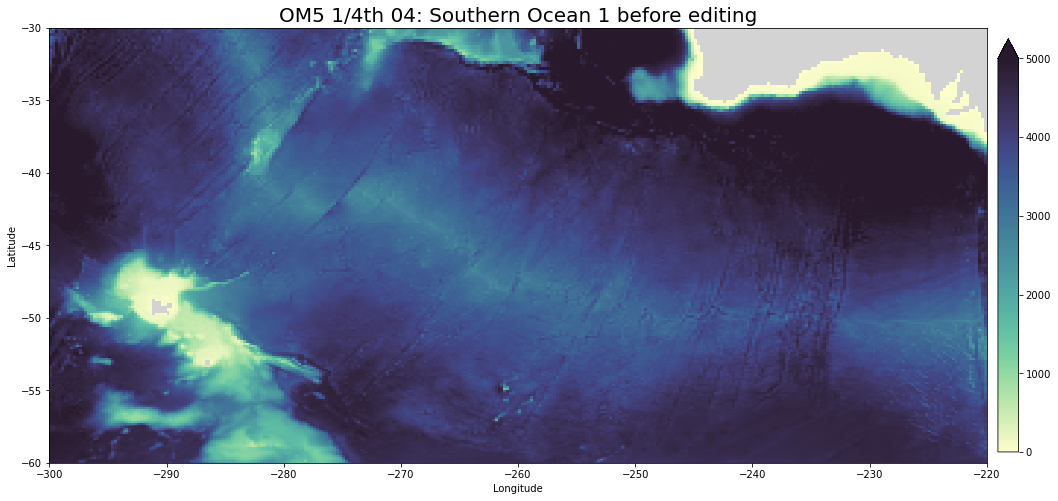

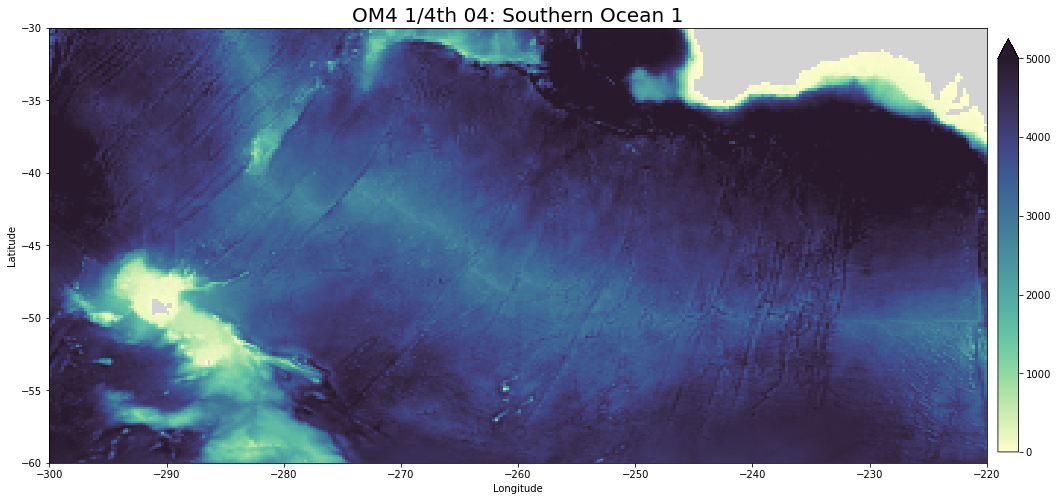

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

Gebco (js:je,is:ie) = 7199:9599,0:2399
OM4 model (js:je,is:ie) = 200:272,0:40
OM5 model (js:je,is:ie) = 281:353,0:40
Using xlim = (-300.0, -290.0) ylim = (-60.0, -50.0)


./tools/topo_tools.py:165: UserWarning: No contour levels were found within the data range.
  thisax.contour(GEBCO.lonh[Gis:Gie], GEBCO.lath[Gjs:Gje], zmask( GEBCO.depth[Gjs:Gje,Gis:Gie] ),


Gebco (js:je,is:ie) = 9599:11999,0:2399
OM4 model (js:je,is:ie) = 270:329,0:40
OM5 model (js:je,is:ie) = 351:410,0:40
Using xlim = (-300.0, -290.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,0:2399
OM4 model (js:je,is:ie) = 327:378,0:40
OM5 model (js:je,is:ie) = 408:459,0:40
Using xlim = (-300.0, -290.0) ylim = (-40.0, -30.0)


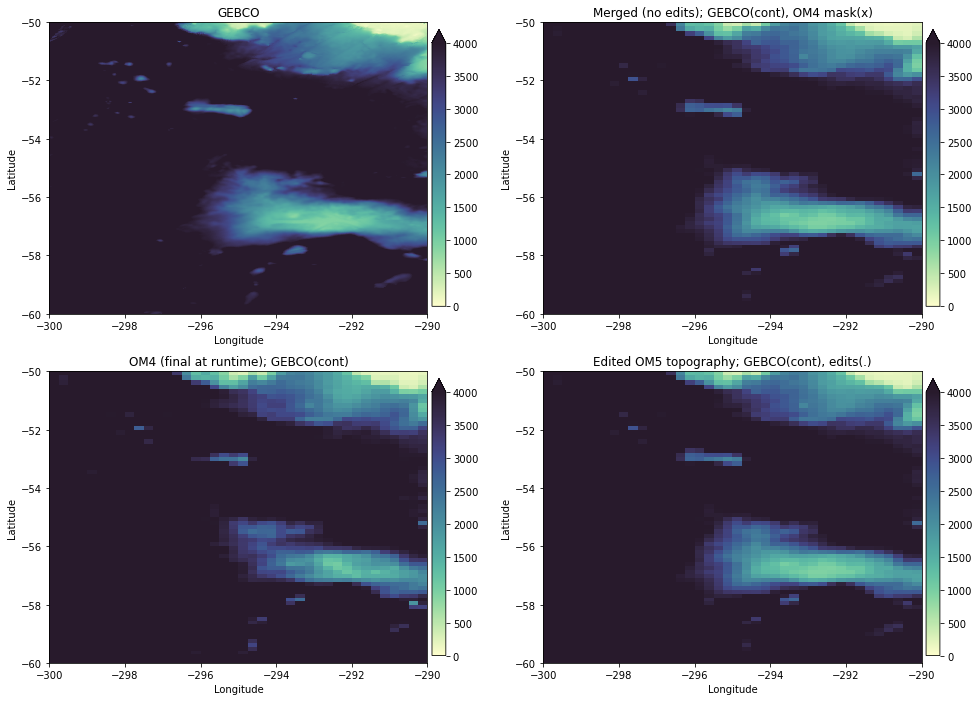

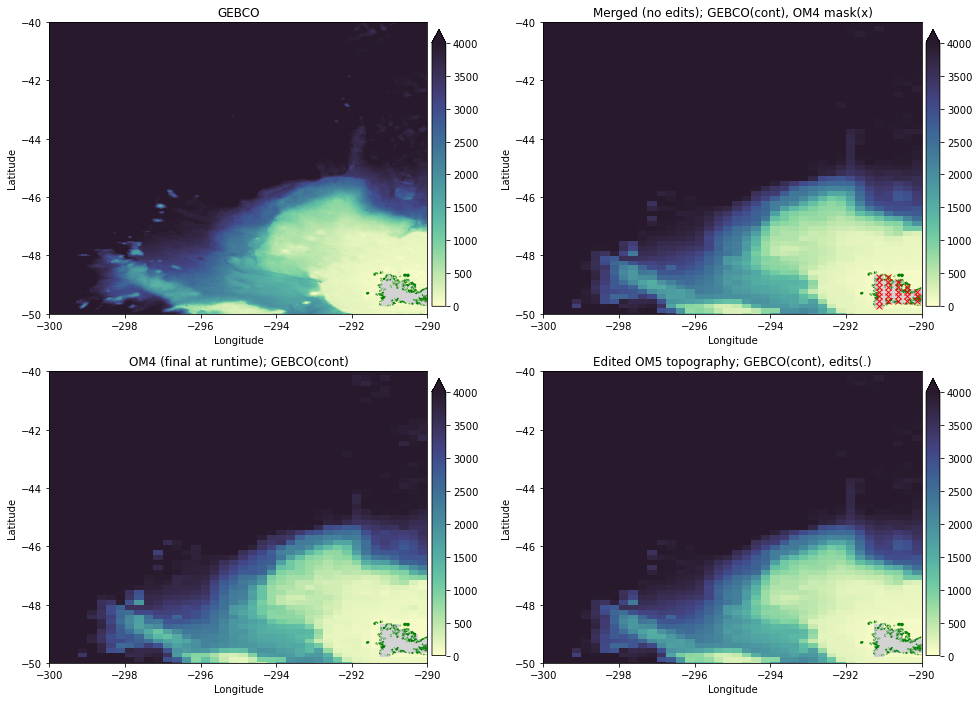

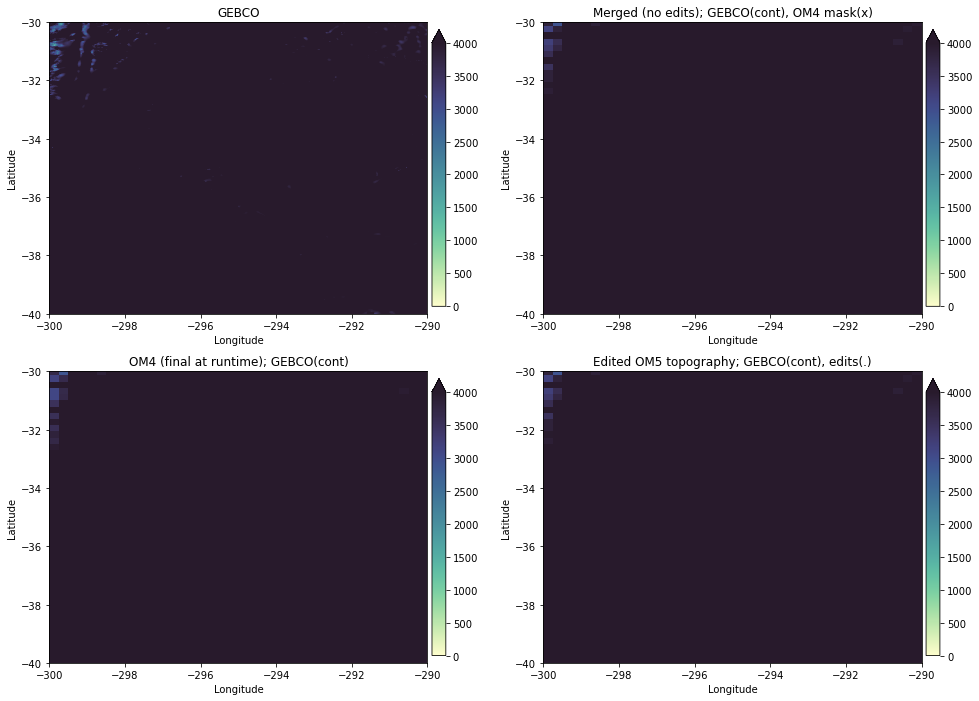

In [8]:
region = Region(-295, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-295, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-295, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 9419:10019,1979:2579
OM4 model (js:je,is:ie) = 266:283,31:43
OM5 model (js:je,is:ie) = 347:364,31:43
Using xlim = (-291.75, -289.25) ylim = (-50.75, -48.25)


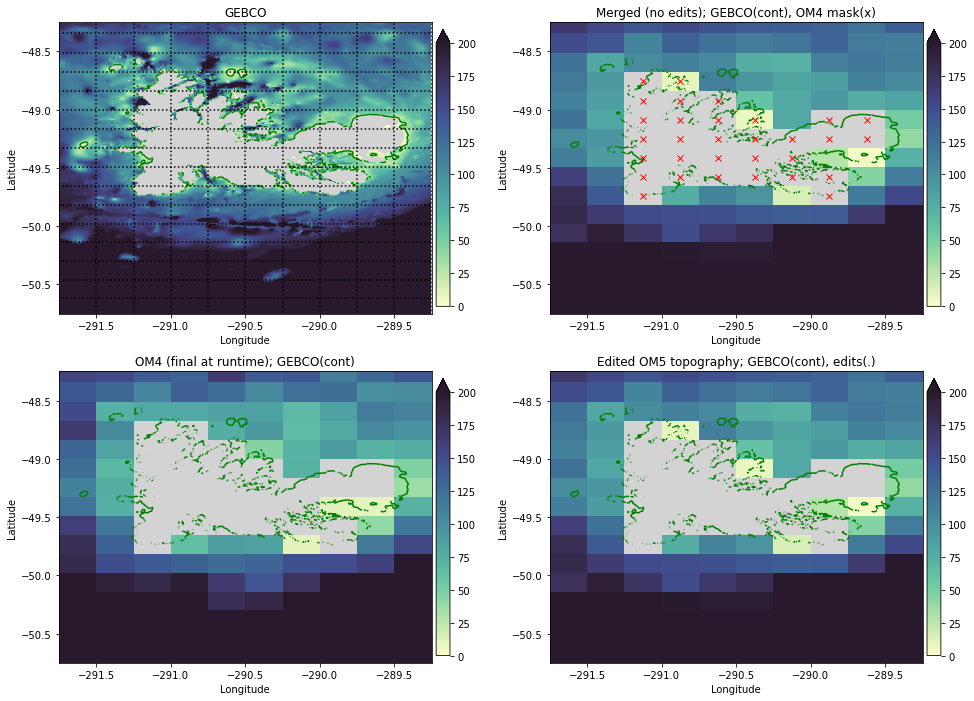

In [9]:
#Zooming into lower right (French Southern and Antarctic Lands)

region = Region(-290.5, -49.5, width_lon=2.5, width_lat=2.5)

map_region(region, 0, 200, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

#Note that new ocean points are created.
#No edits needed.

Gebco (js:je,is:ie) = 7199:9599,2399:4800
OM4 model (js:je,is:ie) = 200:272,38:80
OM5 model (js:je,is:ie) = 281:353,38:80
Using xlim = (-290.0, -280.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,2399:4800
OM4 model (js:je,is:ie) = 270:329,38:80
OM5 model (js:je,is:ie) = 351:410,38:80
Using xlim = (-290.0, -280.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,2399:4800
OM4 model (js:je,is:ie) = 327:378,38:80
OM5 model (js:je,is:ie) = 408:459,38:80
Using xlim = (-290.0, -280.0) ylim = (-40.0, -30.0)


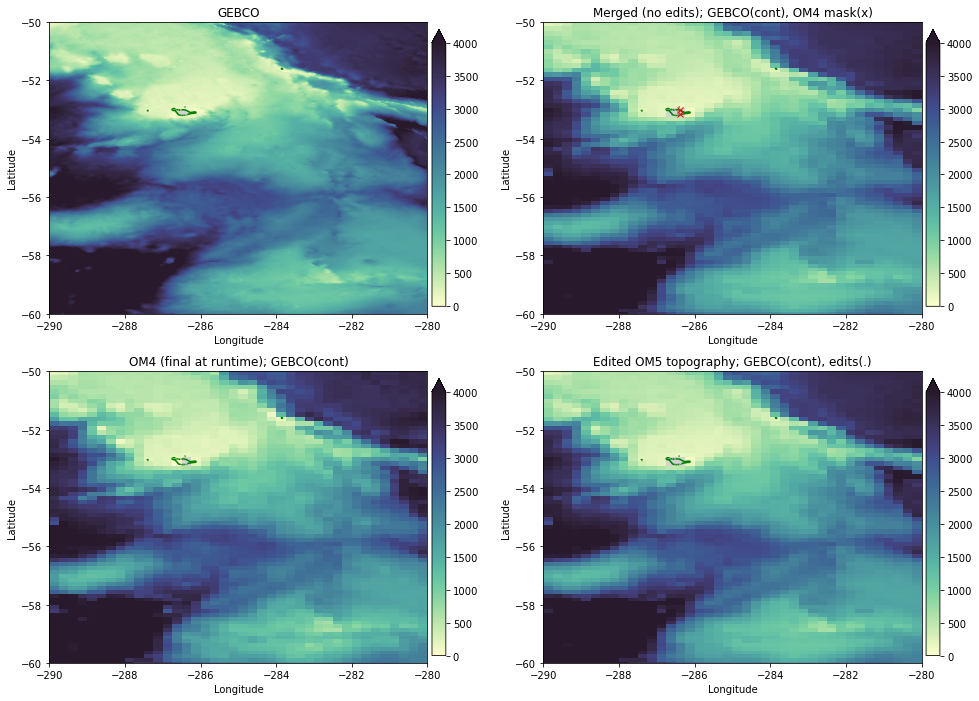

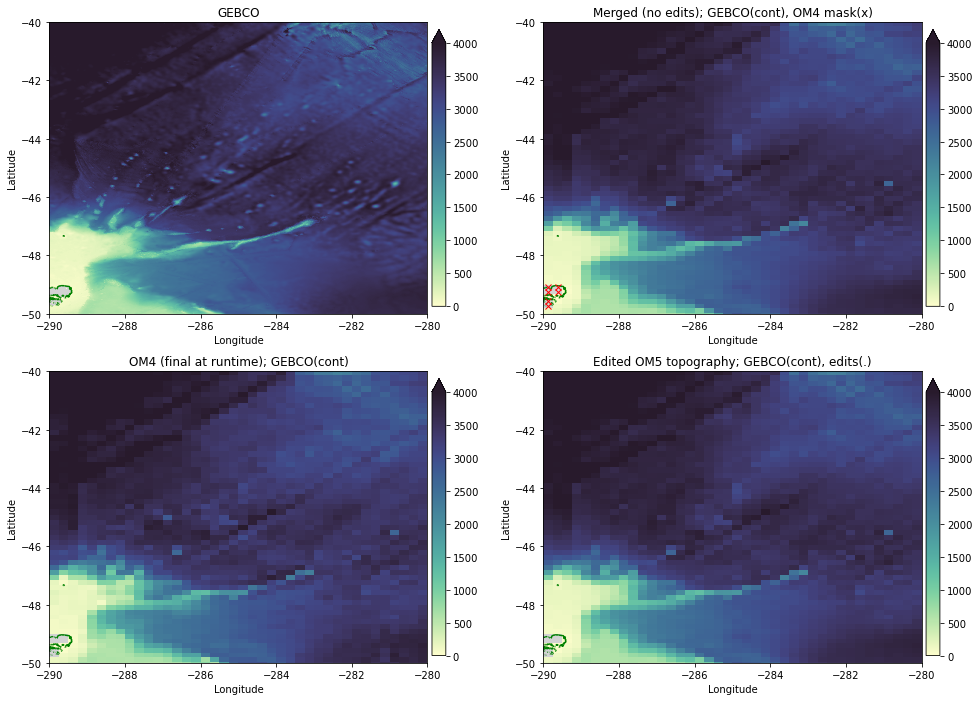

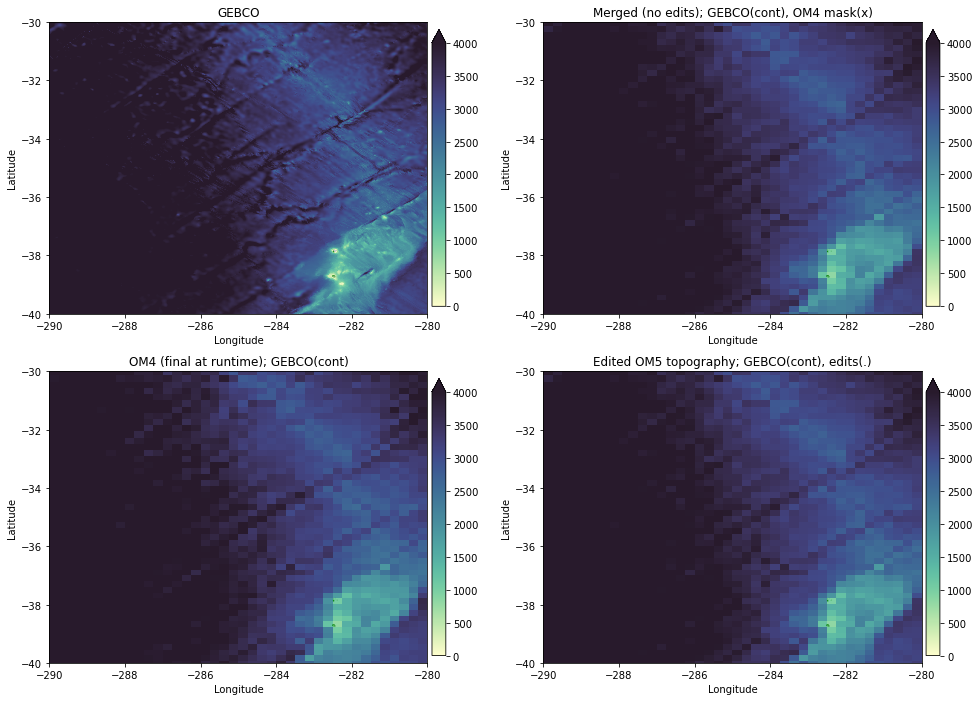

In [10]:
region = Region(-285, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed.

region = Region(-285, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
# No edits needed

region = Region(-285, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 8639:9119,2999:3479
OM4 model (js:je,is:ie) = 244:260,48:58
OM5 model (js:je,is:ie) = 325:341,48:58
Using xlim = (-287.5, -285.5) ylim = (-54.0, -52.0)


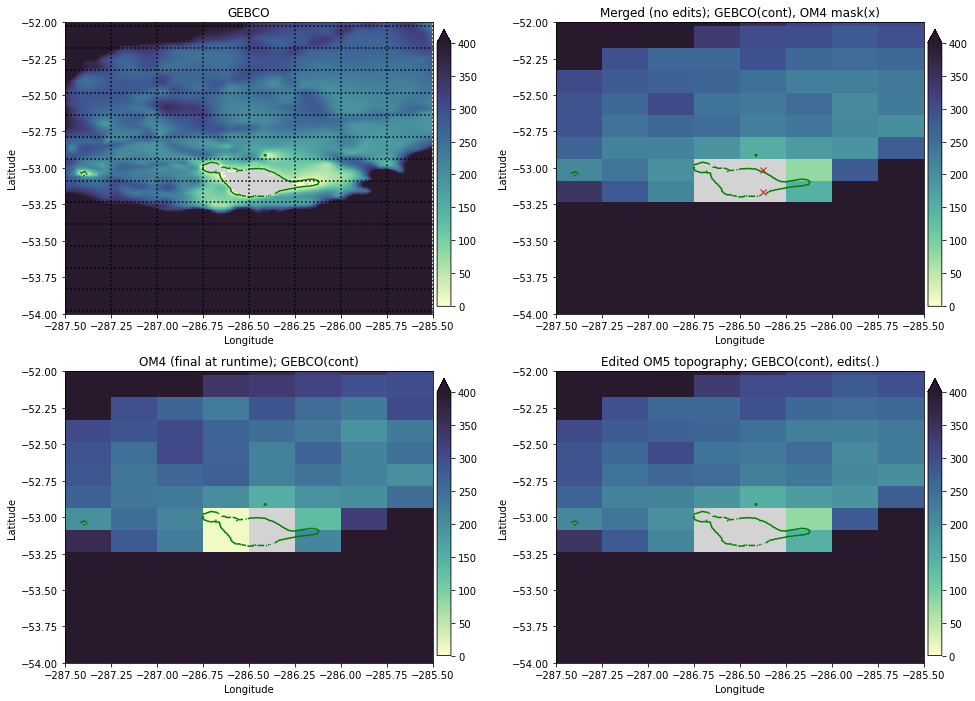

In [11]:
#Zoom into island (Heard Island and McDonald Islands)
region = Region(-286.5, -53, width_lon=2, width_lat=2)

map_region(region, 0, 400, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

#Note new land created
#No edits needed.

Gebco (js:je,is:ie) = 7199:9599,4800:7200
OM4 model (js:je,is:ie) = 200:272,78:120
OM5 model (js:je,is:ie) = 281:353,78:120
Using xlim = (-280.0, -270.0) ylim = (-60.0, -50.0)


./tools/topo_tools.py:165: UserWarning: No contour levels were found within the data range.
  thisax.contour(GEBCO.lonh[Gis:Gie], GEBCO.lath[Gjs:Gje], zmask( GEBCO.depth[Gjs:Gje,Gis:Gie] ),


Gebco (js:je,is:ie) = 9599:11999,4800:7200
OM4 model (js:je,is:ie) = 270:329,78:120
OM5 model (js:je,is:ie) = 351:410,78:120
Using xlim = (-280.0, -270.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,4800:7200
OM4 model (js:je,is:ie) = 327:378,78:120
OM5 model (js:je,is:ie) = 408:459,78:120
Using xlim = (-280.0, -270.0) ylim = (-40.0, -30.0)


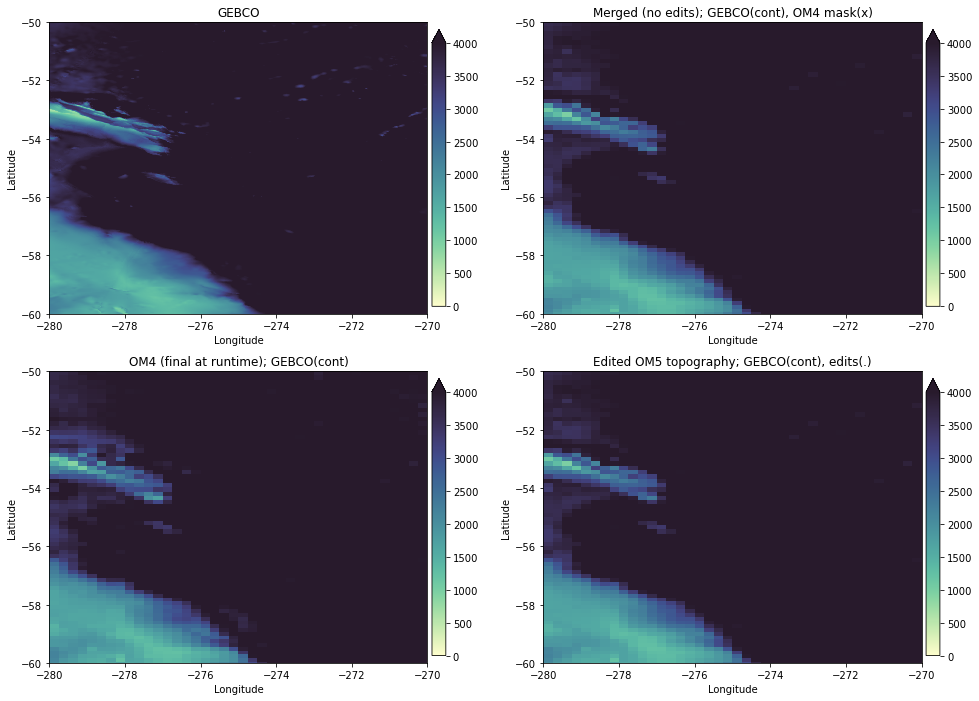

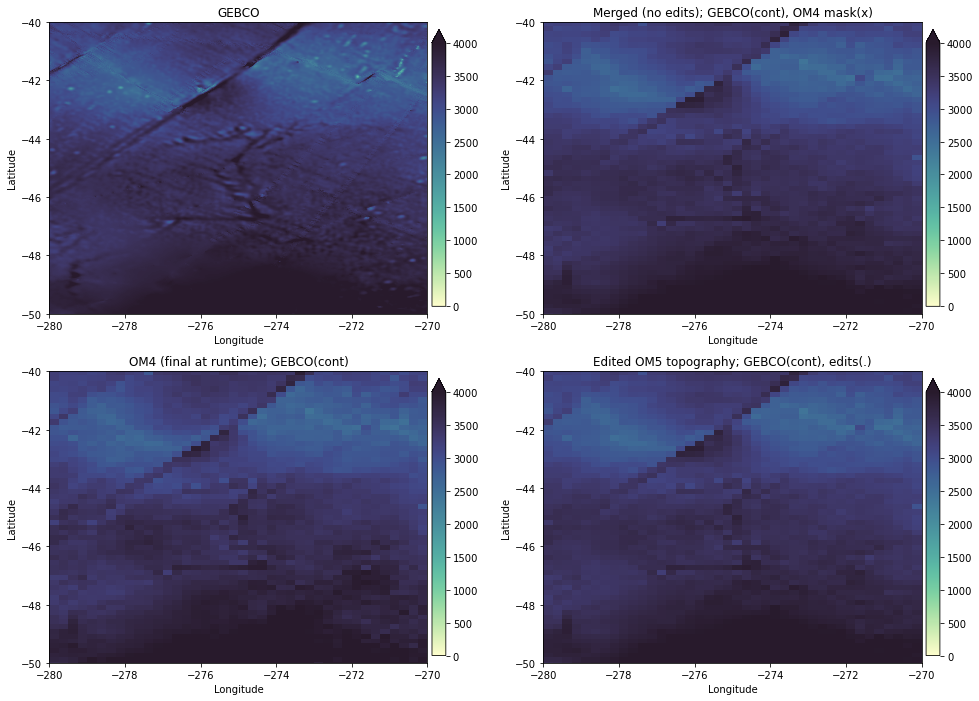

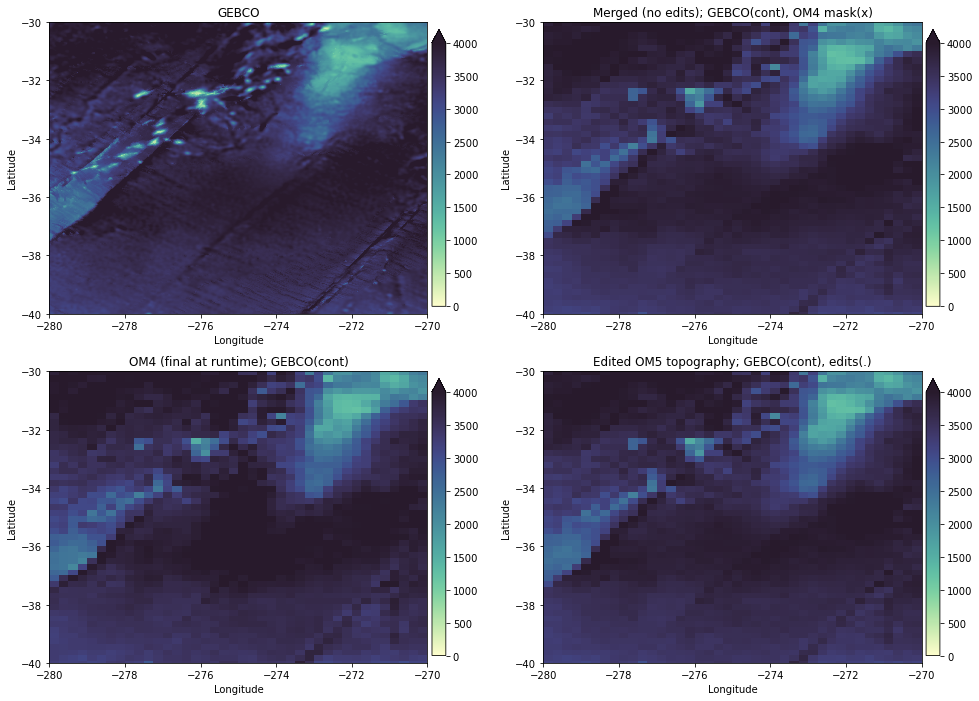

In [12]:
region = Region(-275, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-275, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-275, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 7199:9599,7200:9600
OM4 model (js:je,is:ie) = 200:272,118:160
OM5 model (js:je,is:ie) = 281:353,118:160
Using xlim = (-270.0, -260.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,7200:9600
OM4 model (js:je,is:ie) = 270:329,118:160
OM5 model (js:je,is:ie) = 351:410,118:160
Using xlim = (-270.0, -260.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,7200:9600
OM4 model (js:je,is:ie) = 327:378,118:160
OM5 model (js:je,is:ie) = 408:459,118:160
Using xlim = (-270.0, -260.0) ylim = (-40.0, -30.0)


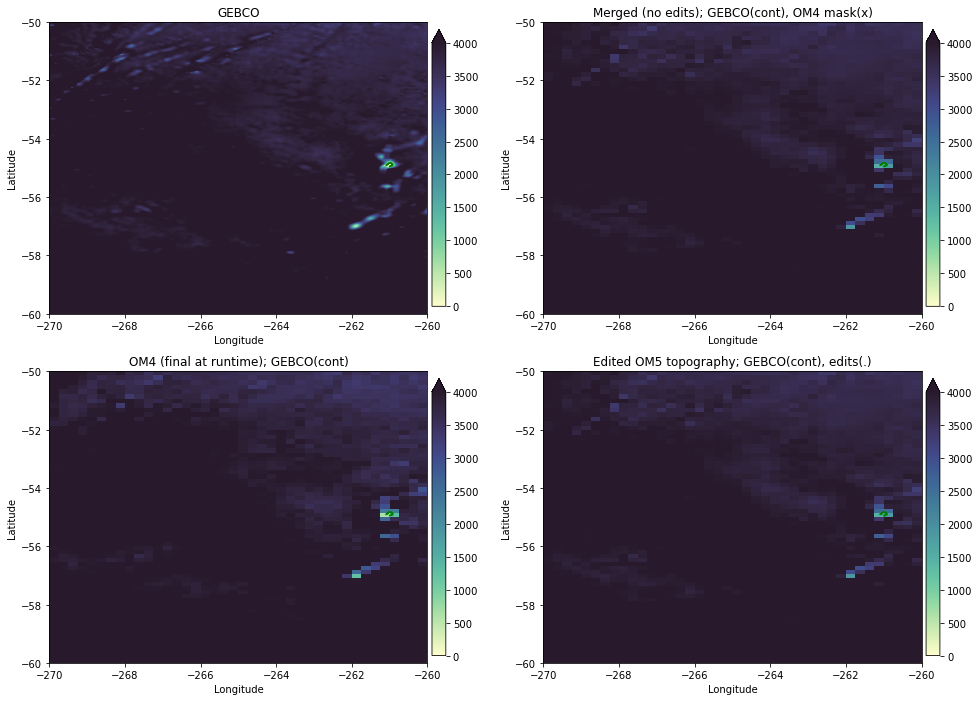

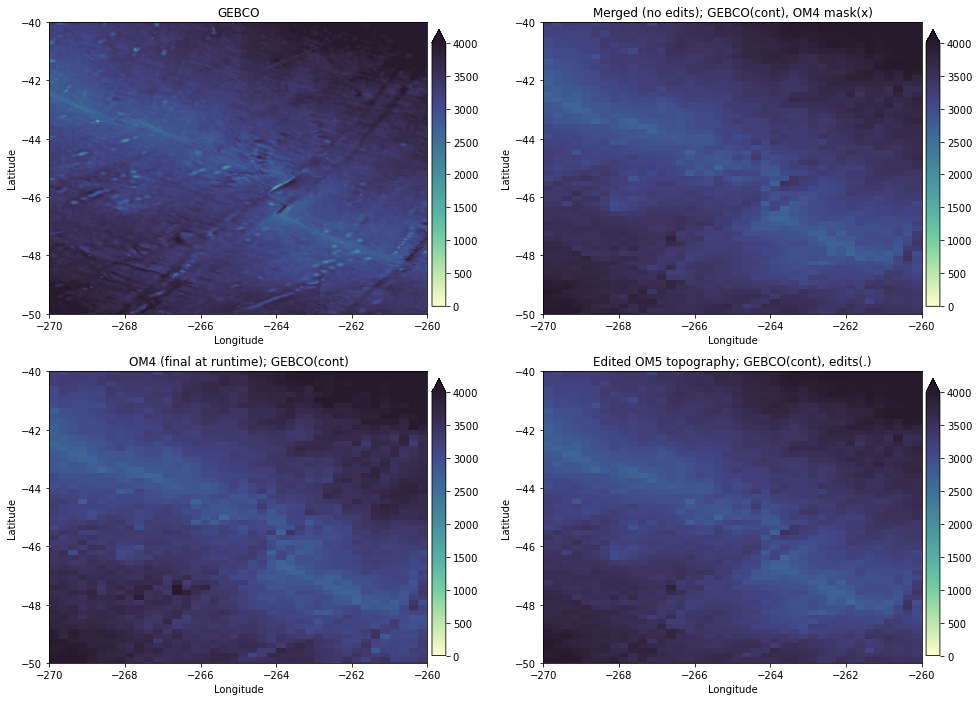

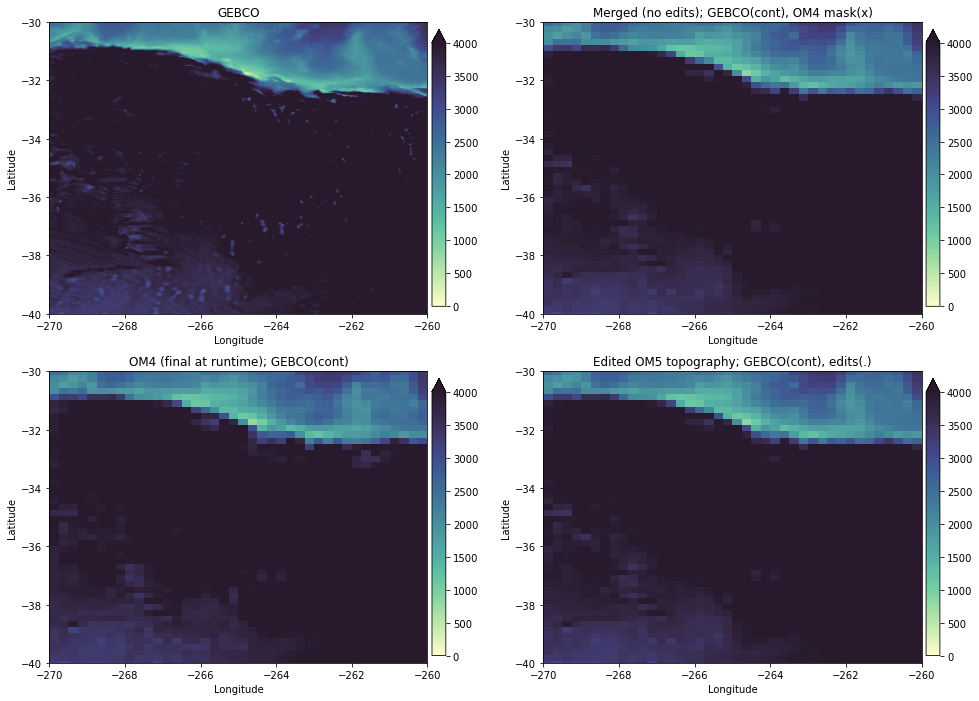

In [13]:
region = Region(-265, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-265, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-265, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 7199:9599,9600:12000
OM4 model (js:je,is:ie) = 200:272,158:200
OM5 model (js:je,is:ie) = 281:353,158:200
Using xlim = (-260.0, -250.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,9600:12000
OM4 model (js:je,is:ie) = 270:329,158:200
OM5 model (js:je,is:ie) = 351:410,158:200
Using xlim = (-260.0, -250.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,9600:12000
OM4 model (js:je,is:ie) = 327:378,158:200
OM5 model (js:je,is:ie) = 408:459,158:200
Using xlim = (-260.0, -250.0) ylim = (-40.0, -30.0)


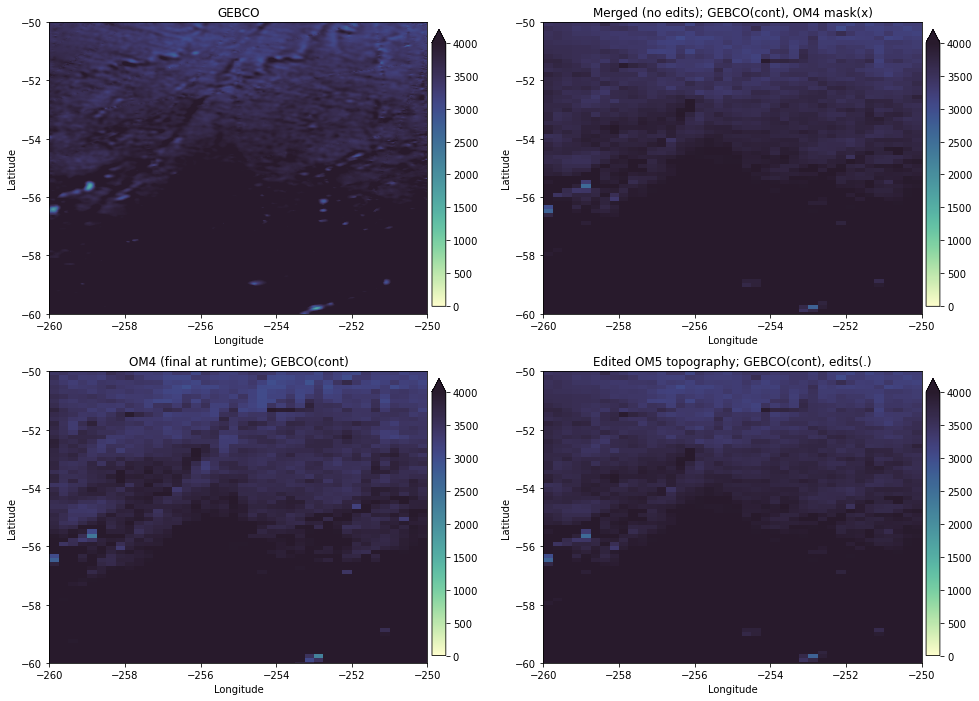

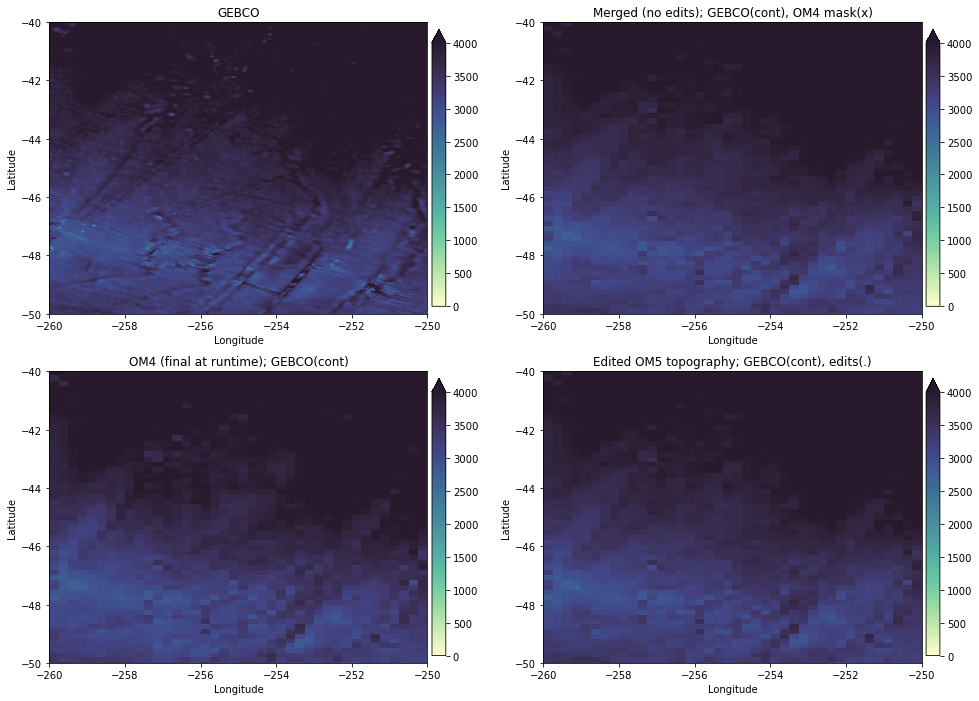

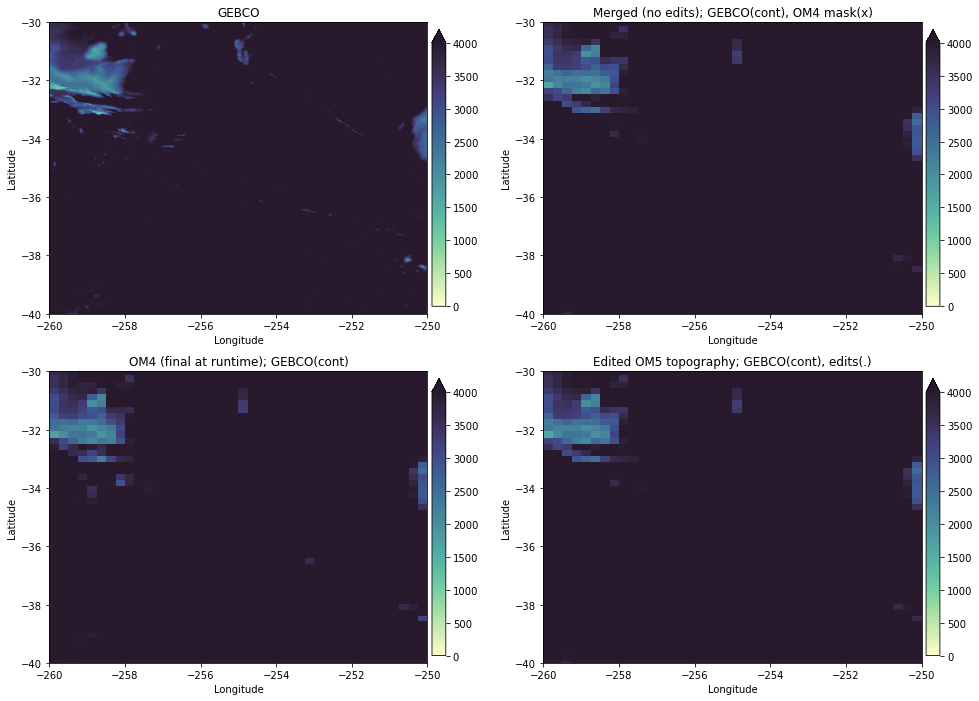

In [14]:
region = Region(-255, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-255, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-255, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 7199:9599,12000:14400
OM4 model (js:je,is:ie) = 200:272,198:240
OM5 model (js:je,is:ie) = 281:353,198:240
Using xlim = (-250.0, -240.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,12000:14400
OM4 model (js:je,is:ie) = 270:329,198:240
OM5 model (js:je,is:ie) = 351:410,198:240
Using xlim = (-250.0, -240.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,12000:14400
OM4 model (js:je,is:ie) = 327:378,198:240
OM5 model (js:je,is:ie) = 408:459,198:240
Using xlim = (-250.0, -240.0) ylim = (-40.0, -30.0)


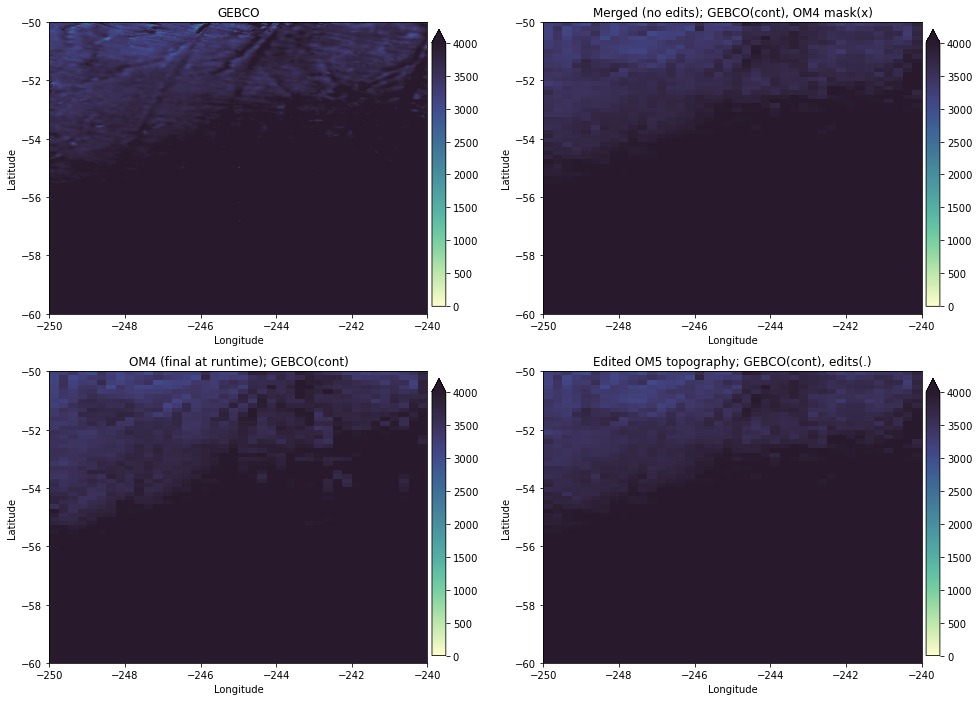

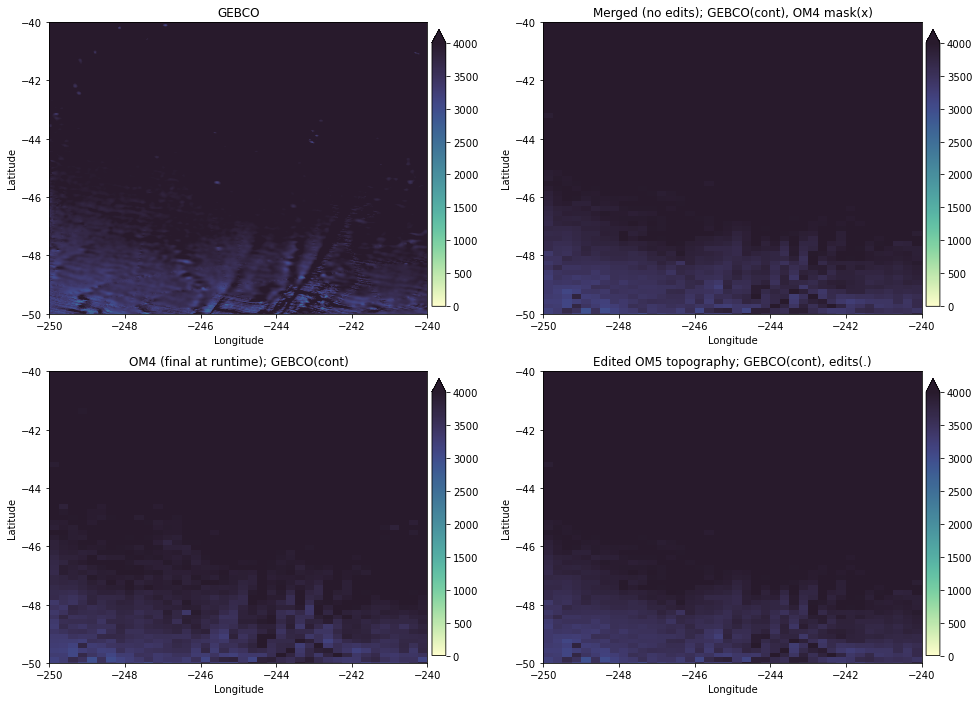

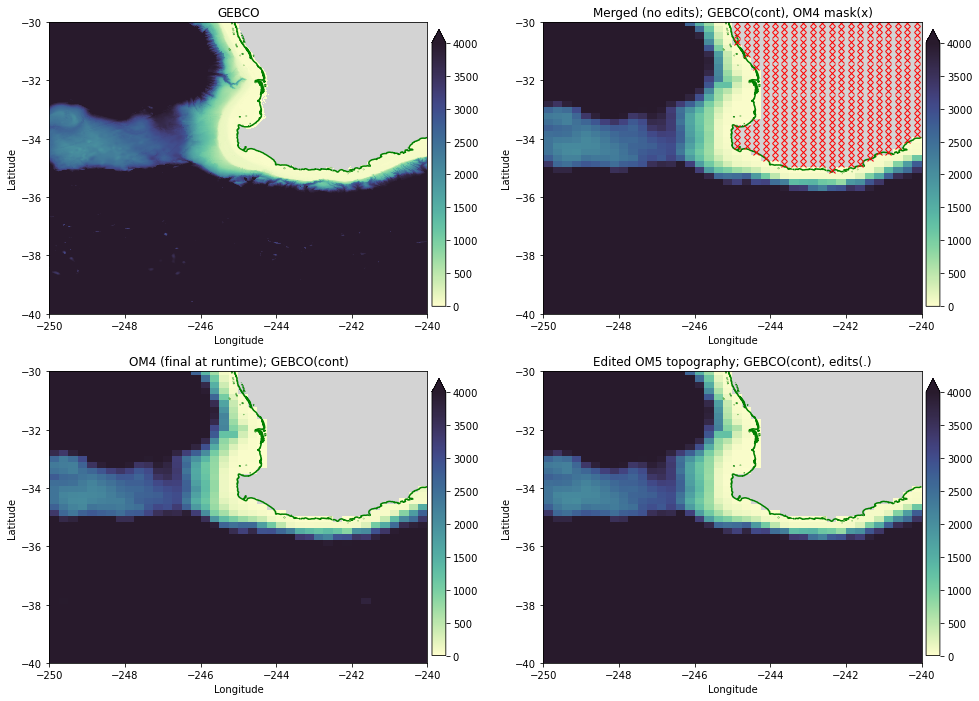

In [15]:
region = Region(-245, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-245, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-245, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

Gebco (js:je,is:ie) = 7199:9599,14400:16800
OM4 model (js:je,is:ie) = 200:272,238:280
OM5 model (js:je,is:ie) = 281:353,238:280
Using xlim = (-240.0, -230.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,14400:16800
OM4 model (js:je,is:ie) = 270:329,238:280
OM5 model (js:je,is:ie) = 351:410,238:280
Using xlim = (-240.0, -230.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,14400:16800
OM4 model (js:je,is:ie) = 327:378,238:280
OM5 model (js:je,is:ie) = 408:459,238:280
Using xlim = (-240.0, -230.0) ylim = (-40.0, -30.0)


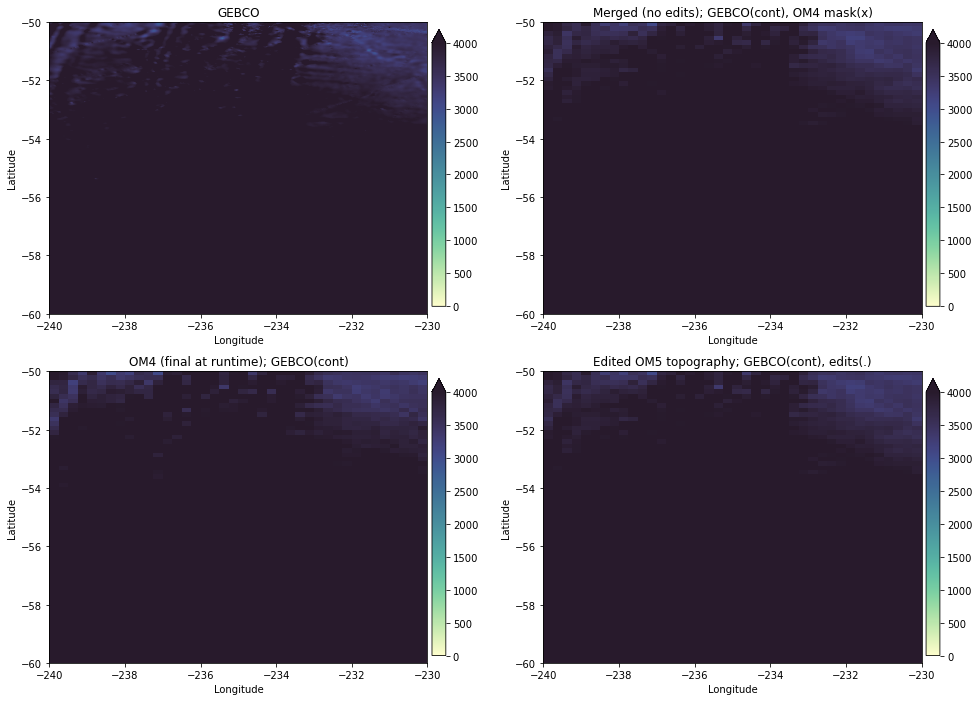

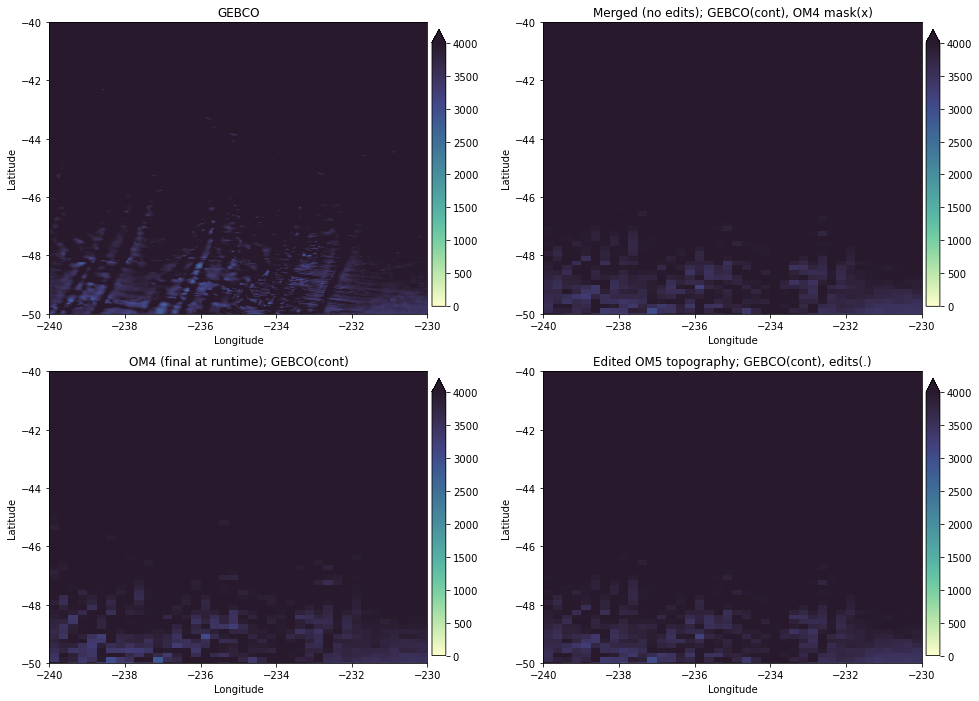

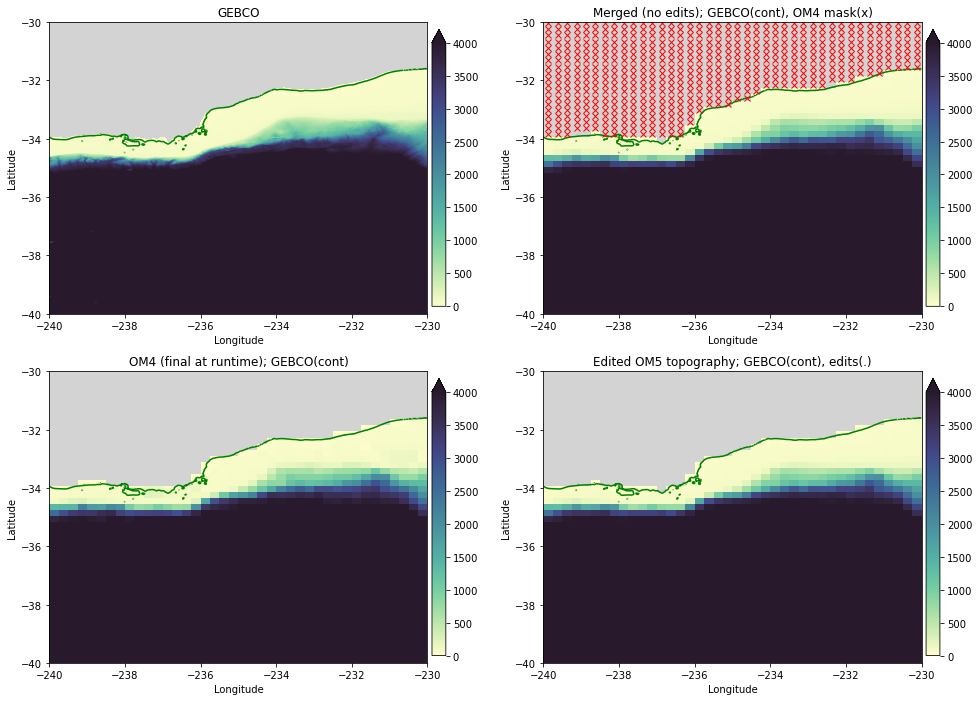

In [16]:
region = Region(-235, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-235, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-235, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#New land created
#No edits needed

Gebco (js:je,is:ie) = 7199:9599,16800:19200
OM4 model (js:je,is:ie) = 200:272,278:320
OM5 model (js:je,is:ie) = 281:353,278:320
Using xlim = (-230.0, -220.0) ylim = (-60.0, -50.0)
Gebco (js:je,is:ie) = 9599:11999,16800:19200
OM4 model (js:je,is:ie) = 270:329,278:320
OM5 model (js:je,is:ie) = 351:410,278:320
Using xlim = (-230.0, -220.0) ylim = (-50.0, -40.0)
Gebco (js:je,is:ie) = 11999:14399,16800:19200
OM4 model (js:je,is:ie) = 327:378,278:320
OM5 model (js:je,is:ie) = 408:459,278:320
Using xlim = (-230.0, -220.0) ylim = (-40.0, -30.0)


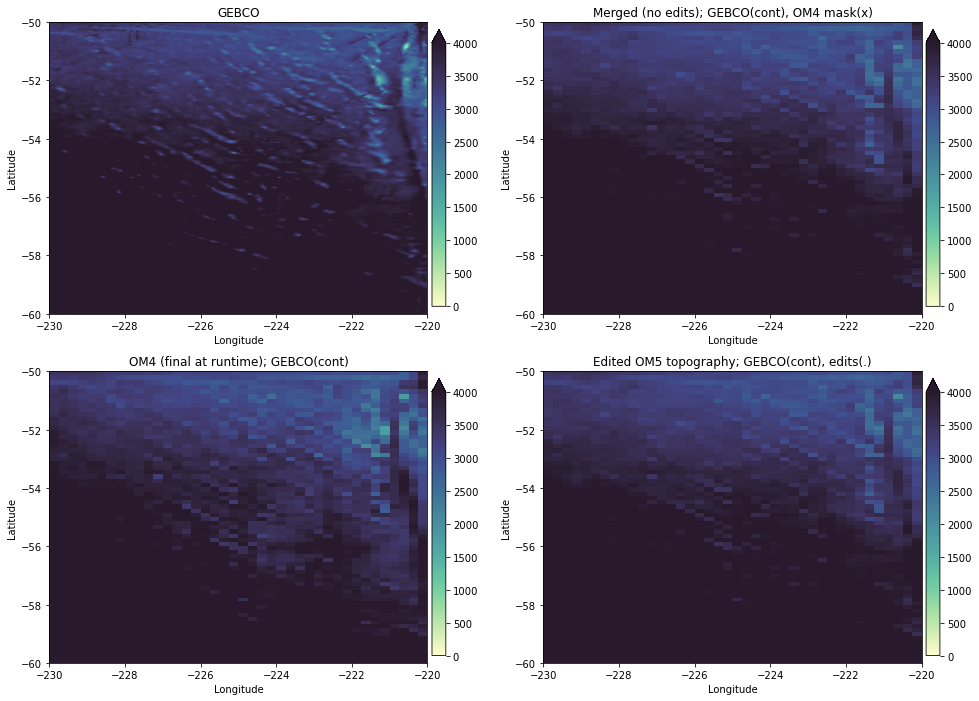

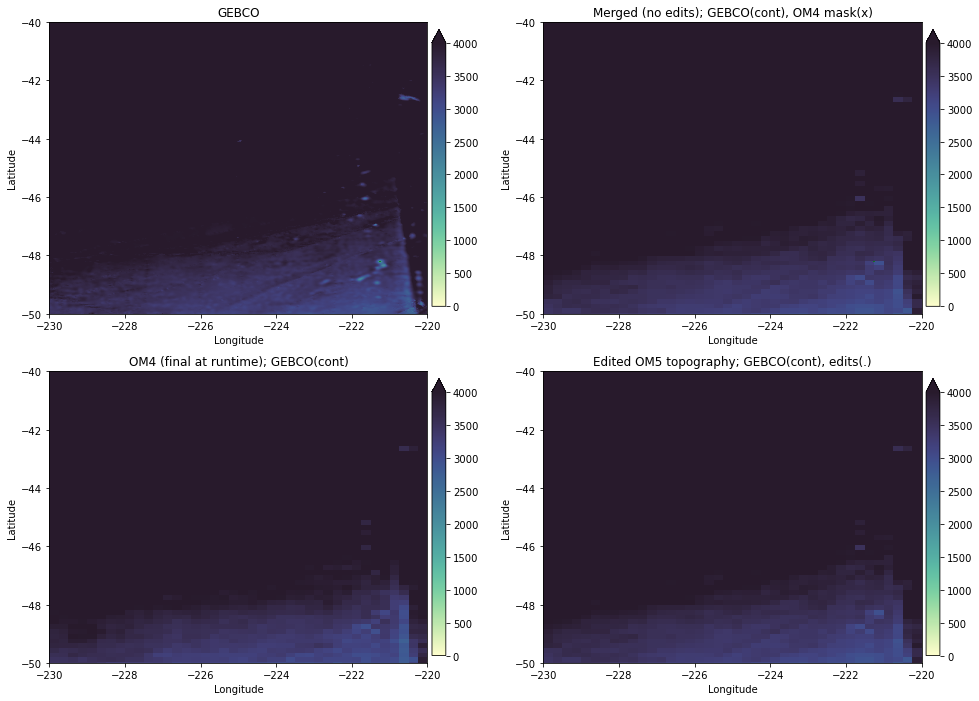

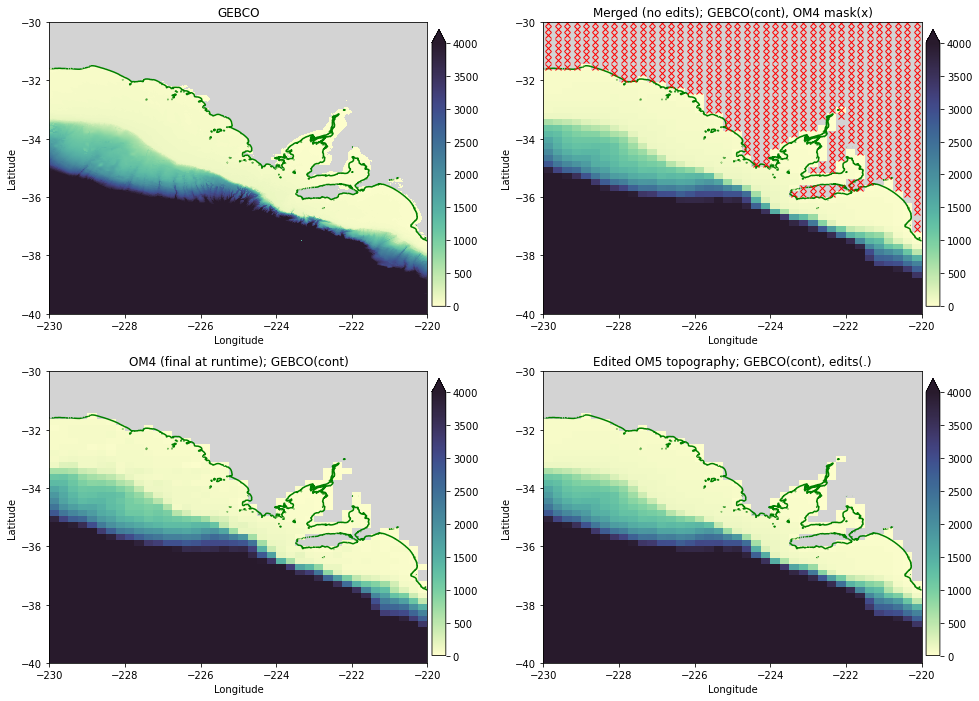

In [17]:
region = Region(-225, -55, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-225, -45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed

region = Region(-225, -35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed?

Gebco (js:je,is:ie) = 12899:13739,18180:19020
OM4 model (js:je,is:ie) = 346:365,301:317
OM5 model (js:je,is:ie) = 427:446,301:317
Using xlim = (-224.25, -220.75) ylim = (-36.25, -32.75)


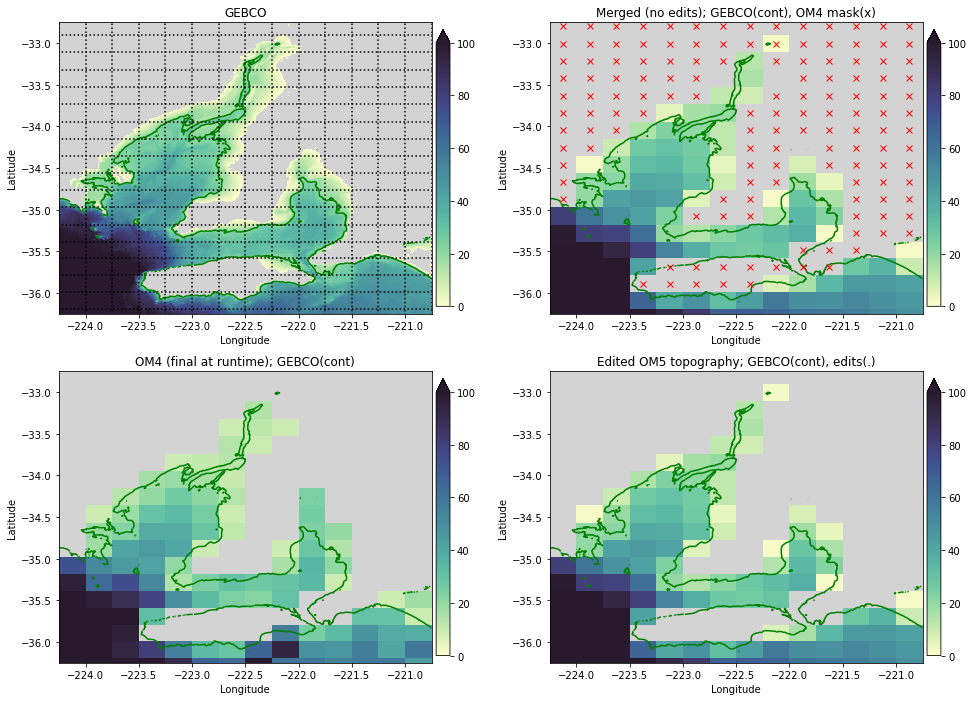

In [18]:
#Zoom into Spencer Gulf
region = Region(-222.5, -34.5, width_lon=3.5, width_lat=3.5)
map_region(region, 0, 100, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);
#No edits needed?